<a href="https://colab.research.google.com/github/Gryffindorrr/Heart-Disease-Prediction-using-Confusion-metrix/blob/main/Heart_Disease_Prediction_using_Confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [102]:
df = pd.read_csv(r'heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [103]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [104]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,54.521739,0.67893,3.163880,131.715719,246.785953,0.143813,0.989967,149.327759,0.331104,1.058528,1.605351,0.672241,4.745819,0.946488
std,9.030264,0.46767,0.964069,17.747751,52.532582,0.351488,0.994903,23.121062,0.471399,1.162769,0.616962,0.937438,1.940977,1.230409
min,29.000000,0.00000,1.000000,94.000000,100.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.00000,3.000000,120.000000,211.000000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.00000,3.000000,130.000000,242.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.00000,4.000000,140.000000,275.500000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.00000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [105]:
df['target'].value_counts()

0    160
1     56
2     35
3     35
4     13
Name: target, dtype: int64

In [106]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [107]:
df['chol'] = df['chol']/df['chol'].max()
df['chol'].head()

0    0.413121
1    0.507092
2    0.406028
3    0.443262
4    0.361702
Name: chol, dtype: float64

In [108]:
df['trestbps']=df['trestbps']/df['trestbps'].max()
df['trestbps'].head()

0    0.725
1    0.800
2    0.600
3    0.650
4    0.650
Name: trestbps, dtype: float64

In [109]:
df['thalach']=df['thalach']/df['thalach'].max()
df['thalach'].head()

0    0.742574
1    0.534653
2    0.638614
3    0.925743
4    0.851485
Name: thalach, dtype: float64

In [110]:
#only required if the headers are not mentioned
#headers = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
#df.columns=headers

In [111]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,0.725,0.413121,1,2,0.742574,0,2.3,3,0,6,0
1,67,1,4,0.800,0.507092,0,2,0.534653,1,1.5,2,3,3,2
2,67,1,4,0.600,0.406028,0,2,0.638614,1,2.6,2,2,7,1
3,37,1,3,0.650,0.443262,0,0,0.925743,0,3.5,3,0,3,0
4,41,0,2,0.650,0.361702,0,2,0.851485,0,1.4,1,0,3,0


In [112]:
df[["age"]] = df[["age"]].astype("int64")

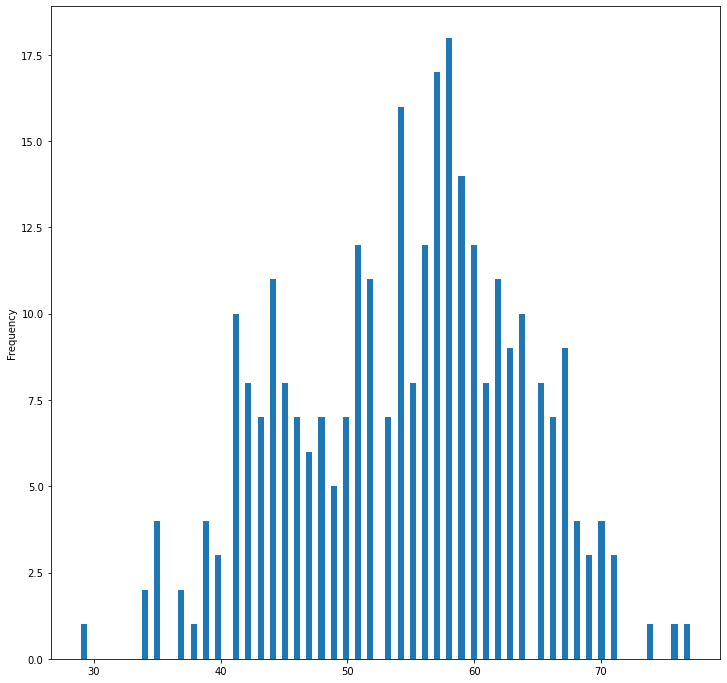

In [113]:
df.age.plot(kind = 'hist', bins = 100, figsize = (12,12))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


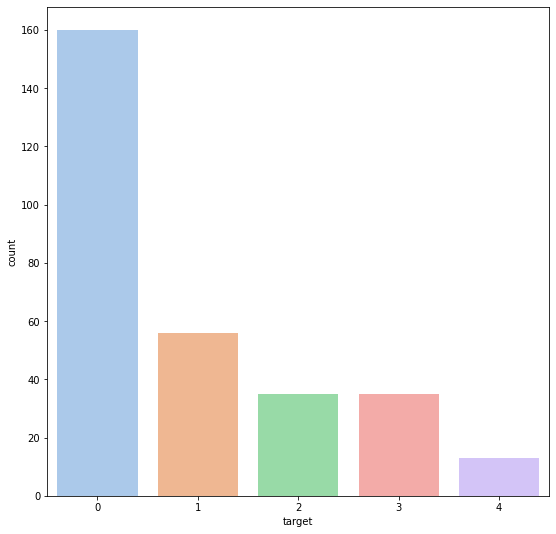

In [114]:
#Distribution of class label
# 0 - Absent / no Disease  1,2,3,4 - Presence/yes
sn.countplot(df['target'], palette = 'pastel')

In [115]:
df['sex'].value_counts()

1    203
0     96
Name: sex, dtype: int64

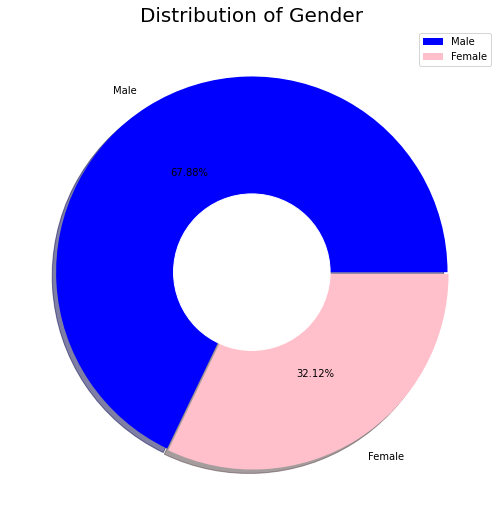

In [116]:
size = [205, 97]
colors = ['blue', 'pink']
labels = "Male", "Female"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.4, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [117]:
#To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:
X=df.iloc[:, :-1].values
X

array([[63.,  1.,  1., ...,  3.,  0.,  6.],
       [67.,  1.,  4., ...,  2.,  3.,  3.],
       [67.,  1.,  4., ...,  2.,  2.,  7.],
       ...,
       [57.,  0.,  2., ...,  2.,  1.,  3.],
       [47.,  1.,  4., ...,  2.,  0.,  7.],
       [56.,  1.,  4., ...,  2.,  0.,  7.]])

In [118]:
y = df.iloc[:,13]
y

0      0
1      2
2      1
3      0
4      0
      ..
294    2
295    3
296    1
297    1
298    1
Name: target, Length: 299, dtype: int64

In [119]:
#Splitting the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [120]:
# scaling the dataset
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [121]:
X_train

array([[ 0.06877439, -1.43669849, -1.16640664, ...,  0.66767034,
        -0.72106735, -0.91715397],
       [ 0.29089709,  0.69604026,  0.86102017, ...,  0.66767034,
         2.41229804,  1.1410601 ],
       [-0.04228696, -1.43669849, -0.15269323, ..., -0.94418028,
        -0.72106735, -0.91715397],
       ...,
       [ 0.95726519,  0.69604026,  0.86102017, ..., -0.94418028,
         2.41229804,  1.1410601 ],
       [-0.48653236,  0.69604026,  0.86102017, ...,  0.66767034,
        -0.72106735,  1.1410601 ],
       [ 1.06832654,  0.69604026,  0.86102017, ...,  0.66767034,
         1.36784291,  0.62650658]])

In [122]:
X_test

array([[ 8.46203844e-01, -1.43669849e+00,  8.61020172e-01,
         9.83643230e-01, -9.76804336e-02, -4.21117444e-01,
        -9.89633793e-01,  1.55467254e-01,  1.39664501e+00,
         3.34394983e-01,  6.67670338e-01, -7.21067350e-01,
        -9.17153967e-01],
       [-4.86532358e-01,  6.96040264e-01, -1.52693233e-01,
        -1.84025968e-01, -1.00138199e+00, -4.21117444e-01,
        -9.89633793e-01,  5.61797827e-01, -7.16001556e-01,
        -9.10194130e-01, -9.44180276e-01, -7.21067350e-01,
        -9.17153967e-01],
       [ 1.79835743e-01,  6.96040264e-01, -1.52693233e-01,
        -1.28422673e-01,  1.28244956e-01,  2.37463447e+00,
         1.02332345e+00, -3.86306845e-01,  1.39664501e+00,
        -3.76798796e-01,  6.67670338e-01,  3.23387781e-01,
         6.26506583e-01],
       [-1.70820721e+00, -1.43669849e+00, -1.52693233e-01,
        -2.13014130e+00, -9.44900646e-01, -4.21117444e-01,
        -9.89633793e-01,  1.28416329e+00, -7.16001556e-01,
        -9.10194130e-01, -9.44180276e

In [123]:
#Shape of train and test data
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (239, 13) (239,)
Test set: (60, 13) (60,)


In [124]:
# Using KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [125]:
#Train Model
neigh = KNeighborsClassifier(n_neighbors = 4).fit(X_train,y_train)

In [126]:
#Prediction
prediction = neigh.predict(X_test)

In [127]:
prediction1=pd.DataFrame(prediction)
prediction1.head()

,0
0,1
1,0
2,0
3,0
4,0


In [128]:
#Accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, prediction)

0.5666666666666667

In [129]:
# Now Using SVM Algorithm 
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)

SVC(random_state=0)

In [130]:
#Predict
y_pred=classifier.predict(X_test)

In [131]:
prediction2=pd.DataFrame(y_pred)
prediction2.head()

,0
0,1
1,0
2,1
3,0
4,0


In [132]:
metrics.accuracy_score(y_test, prediction2)

0.5666666666666667

In [133]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction1)

array([[28,  1,  0,  0,  0],
       [ 7,  3,  1,  1,  0],
       [ 7,  1,  1,  0,  0],
       [ 1,  3,  2,  2,  1],
       [ 0,  0,  1,  0,  0]])

In [134]:
confusion_matrix(y_test,prediction2)

array([[28,  1,  0,  0,  0],
       [ 9,  3,  0,  0,  0],
       [ 5,  2,  2,  0,  0],
       [ 3,  3,  2,  1,  0],
       [ 1,  0,  0,  0,  0]])

In [135]:
from sklearn.tree import DecisionTreeClassifier
HeartTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [136]:
HeartTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [137]:
y_pred = HeartTree.predict(X_test)

In [138]:
prediction3=pd.DataFrame(y_pred)
prediction3.head()

,0
0,0
1,0
2,0
3,0
4,0


In [139]:
#Accuracy
metrics.accuracy_score(y_test,prediction3)

0.6

In [140]:
confusion_matrix(y_test,prediction3)

array([[28,  0,  0,  1,  0],
       [ 6,  3,  2,  1,  0],
       [ 4,  0,  4,  1,  0],
       [ 1,  2,  5,  1,  0],
       [ 1,  0,  0,  0,  0]])